In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.visualization import astropy_mpl_style

plt.style.use(astropy_mpl_style)

1

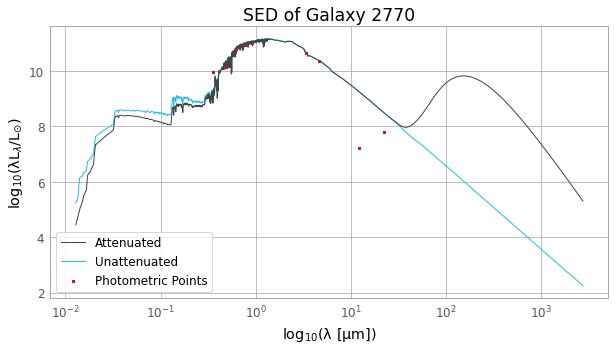

In [2]:
path='/home/pablet/Downloads/MAGPHYS/magphys'

def plot_sed(galaxy):
    filt = ascii.read(path+'/files/filters.dat')
    lambda_eff = filt['lambda_eff'] #están en nanómetros

    name_fit = path+'/fit/'+galaxy+'.fit'
    name_sed = path+'/sed/'+galaxy+'.sed'

    data_flux = ascii.read(name_fit, data_end=2)
    flux= data_flux[0]
    flux_err= data_flux[1]
    
    data_fit= ascii.read(name_fit, data_start=2, data_end=3, names=['i_sfh', 'i_ir', 'chi2', 'redshift'])
    z= data_fit['redshift']
    
    data_sed= ascii.read(name_sed, data_start=2)
    wl_log= data_sed['col1']
    att= data_sed['col2']
    no_att= data_sed['col3']
    
    wl= 10**wl_log
    att= np.log10(wl*10**att)
    no_att= np.log10(wl*10**no_att)
    
    plt.subplots(1, 1, figsize=(10,5))
    plt.plot(wl*1e-4, att, lw=1, c='#444444', label='Attenuated', zorder=2) #usamos wl en nanómetros
    plt.plot(wl*1e-4, no_att, lw=1, c='#20bfe5', label='Unattenuated', zorder=1) #usamos wl en nanómetros

    L_flux= np.log10((1+z)*list(flux)*3e14/list(lambda_eff))
    #puntos fotométricos
    plt.scatter(lambda_eff, L_flux, c='#b41d1d', s=6, marker='s', label='Photometric Points', zorder=3)
    
    plt.title('SED of Galaxy '+galaxy)
    plt.ylabel('log$_{10}$(λL$_{λ}$/L$_{\odot}$)')
    plt.xlabel('log$_{10}$(λ [μm])')
    plt.xscale('log')
    plt.legend(loc='best')
    a=1
    return a

plot_sed('2770')
